In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('orbit - orbit.csv')
df.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [3]:
df

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201
...,...,...
1995,9.959980,99.201201
1996,9.969985,99.400601
1997,9.979990,99.600200
1998,9.989995,99.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_steps  2000 non-null   float64
 1   y           2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [5]:
df.describe()

,time_steps,y
count,2000.000000,2000.000000
mean,0.000000,33.366683
std,5.777835,29.851521
min,-10.000000,0.000025
25%,-5.000000,6.268792
50%,0.000000,25.025044
75%,5.000000,56.268780
max,10.000000,100.000000


In [6]:
df.isna().sum()

time_steps    0
y             0
dtype: int64

In [7]:
df.duplicated().sum()

0

No nulls nor duplicates

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
# Split features (time_steps) and target (y)
X = df[['time_steps']]
y = df['y']

In [10]:
# Split data into train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [12]:
# Define the neural network architecture
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [13]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=500, batch_size=32, callbacks=[early_stop], verbose=1)


Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7530 - mae: 0.7792 - val_loss: 0.4141 - val_mae: 0.5827
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3751 - mae: 0.5475 - val_loss: 0.0227 - val_mae: 0.1209
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1178 - mae: 0.2606 - val_loss: 0.0190 - val_mae: 0.0997
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0848 - mae: 0.2166 - val_loss: 0.0123 - val_mae: 0.0948
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0703 - mae: 0.1907 - val_loss: 0.0188 - val_mae: 0.1111
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0732 - mae: 0.1946 - val_loss: 0.0230 - val_mae: 0.1116
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0636 - mae: 0.1829 - val_loss: 0.0124 - val_mae: 0.0898
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0483 - mae: 0.1573 - val_loss: 0.0111 - val_mae: 0.0736
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.043

In [14]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled y values to original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"R2 Score: {r2}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test MSE: 1.8252954342871277
Test MAE: 1.0012280282269874
R2 Score: 0.997792286746422


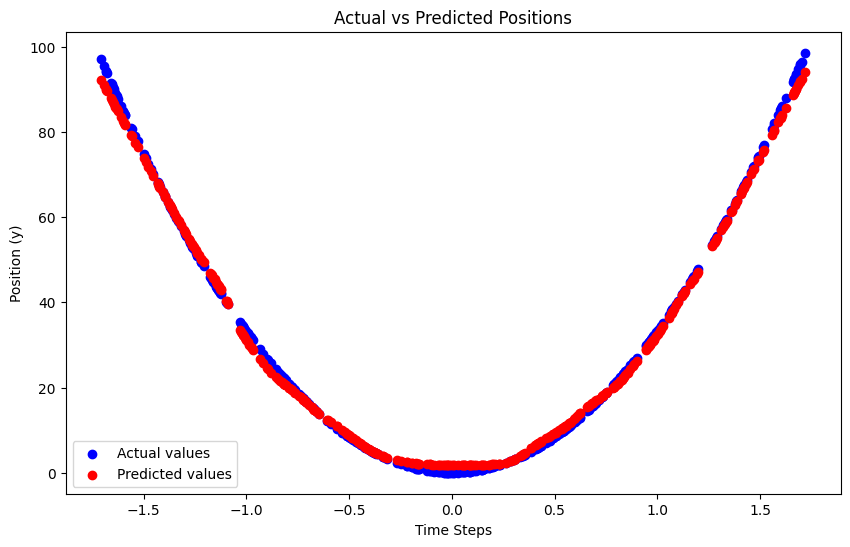

In [15]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Actual vs Predicted Positions')
plt.xlabel('Time Steps')
plt.ylabel('Position (y)')
plt.legend()
plt.show()
